# Descripción
Arreglar el gráfico (Core)

Arreglar el Código en Python, Pandas y Matplotlib


# Objetivo

El objetivo de esta actividad es consolidar tus conocimientos en Python, Pandas y Matplotlib. Se te proporcionará un código con errores que necesitas identificar y corregir. Esta actividad te ayudará a desarrollar habilidades de depuración y a reforzar tu comprensión de los conceptos básicos de programación, manipulación de datos y visualización gráfica.


# Descripción del Ejercicio

A continuación, se presenta un código con errores que contiene tareas de Python, Pandas y Matplotlib. Tu tarea es encontrar y corregir los errores para que el código funcione correctamente y genere las visualizaciones adecuadas.



In [1]:
# *********** Código con Errores ***********

import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo en formato CSV
data = """
fecha,ventas
2023-01-01,200
2023-01-02,220
2023-01-03,210
2023-01-04,205
2023-01-05,215
2023-01-06,225
"""

# Cargar los datos en un DataFrame de Pandas
df = pd.read_csv(pd.compat.StringIO(data))

# Convertir la columna 'fecha' a formato datetime
df['fecha'] = pd.to_datetime(df['fechas'])

# Gráfico de líneas de las ventas
plt.figure(figsize=(10, 6))
plt.plot(df['fecha'], df['ventas'])
plt.title("Ventas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

# Crear un gráfico de dispersión
plt.scatter(df['fecha'], df['ventas'])
plt.title("Ventas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

# Crear un histograma de las ventas
plt.hist(df['ventas'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribución de Ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()

AttributeError: module 'pandas.compat' has no attribute 'StringIO'

## Tareas

1. Identificar y corregir errores en la carga de datos:
Asegúrate de que los datos se carguen correctamente en un DataFrame de Pandas.
2. Corregir la conversión de la columna ‘fecha’ a formato datetime:
Asegúrate de que la columna ‘fecha’ se convierta correctamente al formato de fecha y hora.
3. Arreglar los gráficos generados por Matplotlib:
Asegúrate de que los gráficos de líneas, dispersión e histograma se generen correctamente.
Instrucciones



## Cargar los Datos:
1. Revisa cómo se están cargando los datos en el DataFrame. Corrige cualquier error relacionado con la carga de datos.
2. Conversión de la Columna ‘Fecha’:
Asegúrate de que la columna ‘fecha’ se esté convirtiendo correctamente a formato datetime.
3. Corregir los Gráficos:
Revisa el código para generar los gráficos de Matplotlib. Asegúrate de que se estén utilizando las columnas correctas y que las visualizaciones sean precisas.

### **1) Desarrollo puntos 1**
Se identificó cuales eran los errores al cargar los datos y se corrigio de forma tal que se pudiera cargara un DataFrame útil para continuar el código

Revisando documentación y con ChatGPT
la forma de cargar los datos propuesta, solo hacía falta cargar una biblioteca

        --> df = pd.read_csv(pd.compat.StringIO(data))

biblioteca requerida

        --> from io import StringIO  # Importar StringIO correctamente

Ya con eso se solucionaba el error, pero bueno, quedó como lo hice jejejeje

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos dados como ejemplo en formato CSV (toca cambiar varias cosas (como el formarto en el que están) para poder ser creados como CSV)
data = """
fecha,ventas
2023-01-01,200
2023-01-02,220
2023-01-03,210
2023-01-04,205
2023-01-05,215
2023-01-06,225
"""
print(type(data),'\n')
# Estos datos se cargan como un texto, así que tocaría manejarlo así

# Dividir las líneas y procesarlas

# Creo una variable extraer todas las variables de las líneas
lines = data.strip().split("\n")
# .srtip() para quitar espacios al inicio o final del texto y .split para dividir el texto como una lista de líneas (para ello el separador como salto de línea)

# Crear otra variable para separar la primera línea porque serían el encabezado, osea el índice 0
header = lines[0].split(",")
# tomo la primera línea con el índice cero y divido con .split(",") determinando que se separen por la coma, y ahí tengo los encabezados

# Crear otra variable que me tome las filas de data para juntarlas y me quede organizado de alguna manera fácil de convertir en DataFrame, en mi caso, diccionarios
rows = [dict(zip(header, line.split(","))) for line in lines[1:]]
# Por un lado le digo que tome todas las líneas menos la primera, y que las itere o recorra con un bucle
# Que en cada iteración, ponga cada línea desde la segunda hasta la última, organizándola en un diccionario cada donde las claves son los encabezados y los valores cada fila

# Crear un DataFrame
df = pd.DataFrame(rows)

# Asegurar que los tipos de datos son correctos
df["ventas"] = pd.to_numeric(df["ventas"])
df["fecha"] = pd.to_datetime(df["fecha"])

print(df)
print('\n',df.dtypes)

<class 'str'> 

       fecha  ventas
0 2023-01-01     200
1 2023-01-02     220
2 2023-01-03     210
3 2023-01-04     205
4 2023-01-05     215
5 2023-01-06     225

 fecha     datetime64[ns]
ventas             int64
dtype: object


### **2) Desarrollo puntos 2**
Esto se desarrolló en la parte anterior, aunque se pide fecha y hora, dado los datos, no creo que sea "tan necesario" ya que solo hay datos por día, no tanto por horas... Igual se podría plantear, aunque supongo todos quedarían con la misma hora y sería añadirla uno mismo, pero si se pone el 00:00:00 no carga las horas, tocó poner al menos 1 segundo

In [23]:
df["fecha"] = pd.to_datetime(df["fecha"].astype(str) + " 00:00:01")

print(df)
print(df.dtypes)

                fecha  ventas
0 2023-01-01 00:00:01     200
1 2023-01-02 00:00:01     220
2 2023-01-03 00:00:01     210
3 2023-01-04 00:00:01     205
4 2023-01-05 00:00:01     215
5 2023-01-06 00:00:01     225
fecha     datetime64[ns]
ventas             int64
dtype: object


### **3) Desarrollo puntos 3**

Si bien el código se ve bien, personalmente no veo errores, espero me puedas dar algún tipo de retroalimentación

Si es notorio que el histograma es "extraño" pero claro, dependiendo de la cantidad de columnas (bins) a mostrar, esto va a ser un gráfico completamente igual a menos que sea igual a 4, dándome como una curva hacía abajo, o 5 que me da un pico (columna) al final del gráfico mas alta que el resto, de lo contrario, siempre me van a dar barras completamente iguales

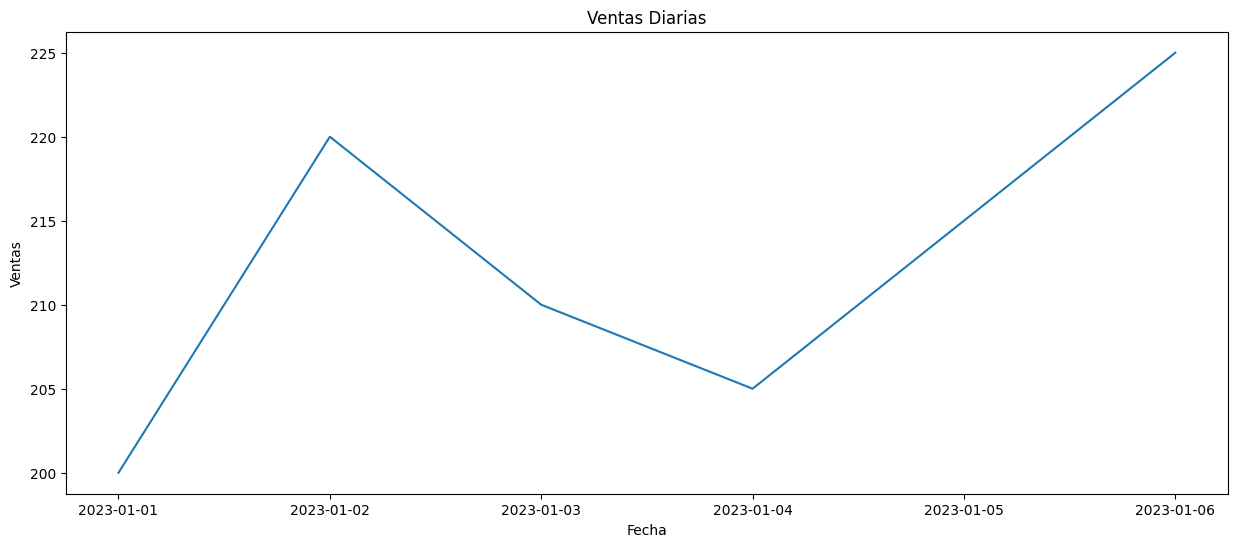

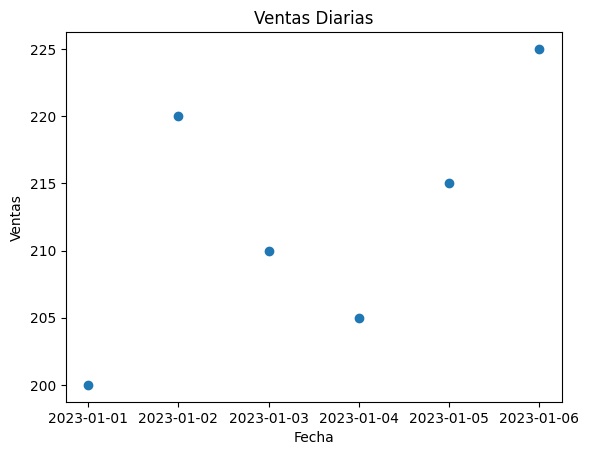

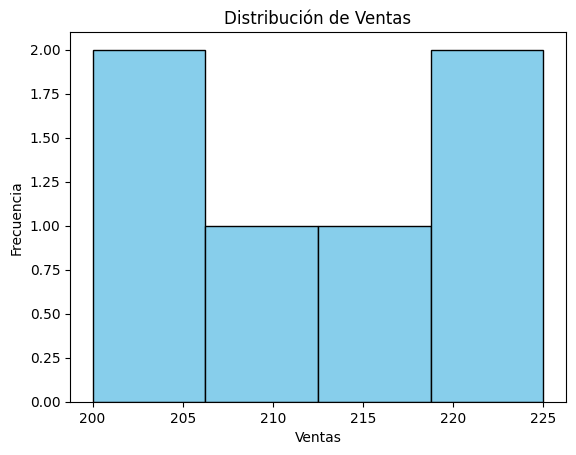

In [32]:
# Gráfico de líneas de las ventas
plt.figure(figsize=(15, 6))

plt.plot(df['fecha'], df['ventas'])
plt.title("Ventas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()
print('\n')

# Crear un gráfico de dispersión
plt.scatter(df['fecha'], df['ventas'])
plt.title("Ventas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()
print('\n')

# Crear un histograma de las ventas
plt.hist(df['ventas'], bins=4, color='skyblue', edgecolor='black')
plt.title("Distribución de Ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()

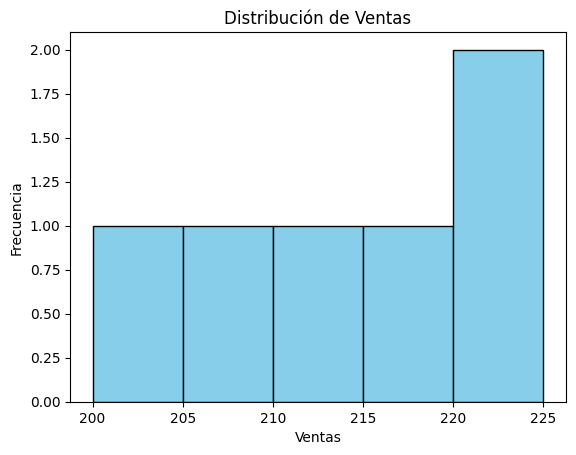

In [35]:
# Ensayo bins 5
plt.hist(df['ventas'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribución de Ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()

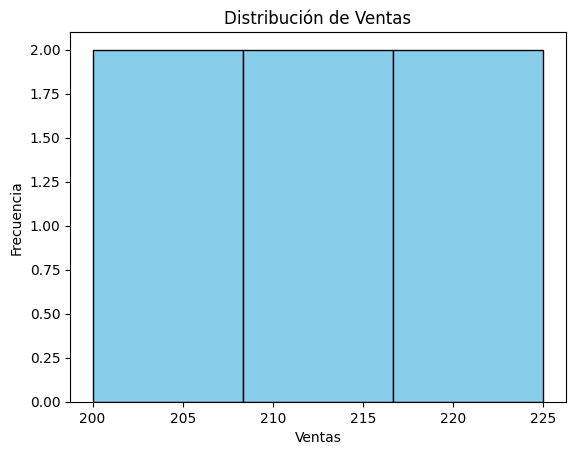

In [33]:
# Ensayo bins 3
plt.hist(df['ventas'], bins=3, color='skyblue', edgecolor='black')
plt.title("Distribución de Ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()